# Homework 10: Basics of Linear Algebra

**Directions:** Please be sure your functions work for vectors with a size of three and matrices that are 3x3. Bonus points if you can further generalize them for larger vectors and matrices

**Import Relavent Modules**

In [1]:
from numpy.linalg import norm
from numpy import arccos, dot
import math

 ### 1.	Explain the dot product and cross product in your own words in markdown. Use LaTeX to properly show the equations.

#### Dot Product

The Dot product equation: 
$$\vec{v} \cdot \vec{w} = \sum_{i=1}^{n} v_iw_i  $$

The equation above, displays the dot product of two vectors. The notation shows that we multiply the respective elements from each vector together (v1*w1, v2*w2, etc.). We then take the sum of those products.

This results in a scalar value. That value essentially tells us how similar directed two vectors are to one another. The dot product can also help us later calculate the angle between the two vectors. 


#### Cross Product

The Cross product equation:
$$\vec{v}\times\vec{w} =|\vec{v}|_2|\vec{w}|_2\sin(\theta)\ n$$

The cross product of two vectors is defined in 3-dimensional space. The cross product calculation results in a vector. That vector is orthogonal to the two vectors used in the calculation. 

### 2. Write a function angle_between(v1, v2) where v1 and v2 are two vectors that are passed in, and the angle between them is calculated.

**Manual Function**

In [10]:
# This function is designed to only utilize modules inherent in Python (i.e. 'math')
# A user can call this function, even if they don't have numpy (or any other module) installed on their machine
# This is why 'norm' and 'dot' functions are not called within this function

# Define a function that accepts two arguments (vector v1 and vector v2)
def angle_between(v1,v2):     
    # import math to call on 'acos' and 'degrees'
    import math
    # Use Try/Except for error handling
    try:
        # Confirm the vectors are of equal length
        if len(v1)==len(v2):
            # For every index value in the range of the length of vector b, multiply vector a by vector b;
            # Take the sum of that iteration and call it 'dot'
            dot = sum([v1[i]*v2[i] for i in range(len(v2))])
            
            # Formula for magnitude of the first vector; take the square of every value, sum, and then sqrt
            mag1 = (sum([v1[i]**2 for i in range(len(v1))]))**(1/2)
            
            # Repeat above formula, but for the second vector instead
            mag2 = (sum([v2[i]**2 for i in range(len(v2))]))**(1/2)
            
            # Find the angle between the two vectors
            angle = math.acos(dot/(mag1*mag2)) # outputs radians 
            
            # Convert radians to degrees and round to 3 decimal points
            angle_degrees = round(math.degrees(angle),3)
            
            # Add the degree sign, so that user knows this is degrees and not radians
            degreesign = u"\N{DEGREE SIGN}"
            # Print with symbol
            print(f"{angle_degrees} \N{DEGREE SIGN}")
        
        # If vectors don't have the same dimension, tell user to try again
        else:
            print('Try again with vectors of same dimension')
    
    # Execute code regardless, but tell user to input a vector if they do not
    except TypeError:
        print('Please input two vectors')

In [11]:
# Test function with single 1x3 vectors
v1 = [3,6,1]
v2 = [-5,-9,4]

angle_between(v1,v2)

150.189 °


In [12]:
# Test function with vectors of length 5
v1 = [3,6,1,2,7]
v2 = [-5,-9,4,9,1]

angle_between(v1,v2)

106.348 °


In [13]:
# Test function with uneven vectors
v1 = [3,6,1]
v2 = [-5,-9,4,9,1]

angle_between(v1,v2)

Try again with vectors of same dimension


In [14]:
# Test with non-vectors (scalars)
v1 = 3
v2 = 4

angle_between(v1,v2)

Please input two vectors


In [15]:
# Test with non-vectors (matrix)
import numpy as np

v1 = np.array([[1,2],
               [3,4]])

v1 = np.array([[5,6],
               [7,8]])

angle_between(v1,v2)

Please input two vectors


### 3. Write a function called row_dot(A, r1, r2) which takes an input matrix called A, one row number identified by r1, and another row number identified by r2 and returns the dot product of the r1 and r2 rows (indexing starts at 0).

In [16]:
# Define a function that accepts a matrix called 'A' and two row numbers from the matrix
# Find the dot product of those rows
def row_dot(A,r1,r2):
    # use try except for error handling
    try:  
        # If the row number arguments are integers
        if type(r1) and type(r2) == int:
            # Find the index position that is equivalent to the row number requested.
            # Subtract 1 to get proper index value of row number
            row_a = A[r1-1]
        
            # Repeat process for the next requested row
            row_b = A[r2-1]
            
            # Ensure the two rows are equal to each other
            if len(row_a)==len(row_b):
                # Calculate do product of the requested rows
                dot = sum([row_a[i]*row_b[i] for i in range(len(row_b))])
                print(dot) # print the dot product
                
            # Message requesting that rows be equal
            else:
                print('Row lengths must be equal')
                
        # Message requesting that valid row numbers are entered in the function
        else:
            print('Please put valid row numbers in args 2 and 3')
    
    # Error message if users enter incorrect arguments
    except IndexError:
        print('One or more row numbers are out of matrix range')
    except TypeError:
        print('Enter valid matrix in first argument')

In [17]:
import numpy as np

# Create sample matrix to test function
A = np.array([[1,2,3],
              [2,3,4],
              [3,4,5]])

# Get row one
r1 = A[0]

# Get row two
r2 = A[1]

# Dot product of the two rows
print(np.dot(r1,r2))

# See if created function gets the same result
row_dot(A,1,2) # Same result; function worked

20
20


In [18]:
# Test if someone does not enter a matrix
row_dot(1,2,3)

Enter valid matrix in first argument


In [19]:
# Test if someone does not enter a matrix
row_dot('apple',2,3)

Enter valid matrix in first argument


In [20]:
# Test valid matrix, but invalid rows
row_dot(A,5,1)

One or more row numbers are out of matrix range


In [21]:
A = np.array([[1,2,3],
              [2,3],
              [3,4,5]])

# Test matrix with uneven rows
row_dot(A,1,2)

Row lengths must be equal


C:\Users\artol\AppData\Local\Temp/ipykernel_2248/2116368273.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  A = np.array([[1,2,3],


In [22]:
# Larger matrix example
C = np.array([[1,2,3,1],
              [2,3,4,2],
              [3,4,5,3],
               [5,4,7,4]])

# Test with rows, other than 1st and 2nd
row_dot(C,2,4)

58


### 4. Write a function matrix_division(m1, m2) that takes in two matrices, m1 and m2, and returns the result. What is the trick with matrix division?

The trick is that you have to multiply the matrix by the inverse of the other matrix, since you cannot technically divide two matrices with each other.

In [23]:
# Create a function that divides matrices 
def matrix_division(m1, m2):
    
    # Import numpy to use linalg function
    import numpy as np
    
    # For the divisor (m2), check that the number of rows are equal to the number of columns
    # AND check that the number of columns in m1 equal the number of rows in m2
    # Finally, check that the determinant of the divisor does not equal zero
    if len(m2) == len(m2[0]) and len(m1[0])==len(m2) and np.linalg.det(m2)!=0:
        
        # Find the inverse of the 2nd argument
        inverse = np.linalg.inv(m2)
        
        # Find the dot product of the first matrix with the inverse of the second
        answer = np.dot(m1,inverse) 
        print(answer)
    
    # Tell user to input divisible matrices
    else:
        print('Check that these matrices are possible to divide')   

In [24]:
# Sample matrices
A = np.array([[7,4],
             [2,3]])
B = np.array([[13,26],
             [39,13]])

# Check function with sample
C = matrix_division(B,A)
C

[[-1. 10.]
 [ 7. -5.]]


In [27]:
# Check with 3x3 matrix
A = np.array([[7,4,2],
             [2,3,4],
             [45,61,20]])

B = np.array([[13,26,5],
             [39,13,3],
             [12,41,8]])

# Check function with sample
C = matrix_division(B,A)
C

B.shape
A.shape

[[-1.56896552 -0.81034483  0.56896552]
 [ 7.15517241 -2.05172414 -0.15517241]
 [-4.5464191  -0.76657825  1.00795756]]


(3, 3)

In [31]:
# Check with uneven matrices
A = np.array([[7,4,2,7,8],
             [2,3,4,9,2],
             [45,61,20,3,9],
             [4,7,8,11,12],
             [3,3,3,44,55]])

B = np.array([[13,26,5],
             [39,13,3],
             [12,41,8]])

# Check function with sample
C = matrix_division(B,A)
C

A.shape
B.shape

Check that these matrices are possible to divide


(3, 3)

In [32]:
# Check with 5x5 matrix
A = np.array([[7,4,2,7,8],
             [2,3,4,9,2],
             [45,61,20,3,9],
             [4,7,8,11,12],
             [3,3,3,44,55]])

B = np.array([[13,26,5,77,8],
             [39,13,3,1,2],
             [12,41,8,14,3],
             [1,2,4,99,5],
             [5,3,7,7,45]])

# Check function with sample
C = matrix_division(B,A)
C

[[-3.2037987  11.54784027  0.7820653  -6.89076039  1.56700447]
 [ 7.27380021 -0.66663065 -0.13780332 -0.43570518 -0.87978997]
 [-5.20463709  3.03450809  1.07685559 -2.29270295  1.02525119]
 [-1.73874111 14.48960652  0.21003911 -7.35548521  1.38738521]
 [ 1.39399728 -4.78617732 -0.19967156  3.38763802  0.08301389]]


### 5. Write a function is_orthogonal(v1,v2, tol), where v1 and v2 are column vectors of the same size and tol is a scalar value strictly larger than 0. The output should be 1 if the angle between v1 and v2 is within tol of π/2; that is, |π/2−θ|<tol, and 0 otherwise. 

In [31]:
def is_orthogonal(v1,v2,tol):
    import math
    
    if len(v1)==len(v2):
        # Find the angle between two vectors
        
            # For every index value in the range of the length of vector b, multiply vector a by vector b;
            # Take the sum of that iteration and call it 'dot'
            dot = sum([v1[i]*v2[i] for i in range(len(v2))])
            
            # Formula for magnitude of the first vector; take the square of every value, sum, and then sqrt
            mag1 = (sum([v1[i]**2 for i in range(len(v1))]))**(1/2)
            
            # Repeat above formula, but for the second vector instead
            mag2 = (sum([v2[i]**2 for i in range(len(v2))]))**(1/2)
            
            # Find the angle between the two vectors
            angle = math.acos(dot/(mag1*mag2)) # outputs radians 
            
            # Using calculated angle from above, return 0 or 1, if angle is within tol of pi/2
            if abs((math.pi/2)-angle)<tol:
                return 1 # condition met
            else:
                return 0 # condition not met

Test function with output given below

In [30]:
import numpy as np

# Test cases for problem 5
a = np.array([[1], [0.001]])
b = np.array([[0.001], [1]])
# output: 1
print(is_orthogonal(a,b, 0.01))

# output: 0
print(is_orthogonal(a,b, 0.001))

# output: 0
a = np.array([[1], [0.001]])
b = np.array([[1], [1]])
print(is_orthogonal(a,b, 0.01))

# output: 1
a = np.array([[1], [1]])
b = np.array([[-1], [1]])
print(is_orthogonal(a,b, 1e-10))

1
0
0
1


### 6. Create a class called vector_calculator. __init__ should take self, vector1, and vector2. It should have two methods inside of it that are from problems 1 and 4 above (angle_between and is_orthogonal). Make sure tol is defaulted but can be overwritten. Make sure you can call angle_between and is_orthogonal through the class and return the correct results as in problems 1 and 4.

In [74]:
class vector_calculator():
    
    def __init__(self, vector1, vector2):
        self.v1 = vector1
        self.v2 = vector2
    
    # angle_between function from previous question
    def angle_between(self, v1, v2):   
        # import math to call on 'acos' and 'degrees'
        import math
        # Use Try/Except for error handling
        try:
            # Confirm the vectors are of equal length
            if len(v1)==len(v2):
                # For every index value in the range of the length of vector b, multiply vector a by vector b;
                # Take the sum of that iteration and call it 'dot'
                dot = sum([v1[i]*v2[i] for i in range(len(v2))])

                # Formula for magnitude of the first vector; take the square of every value, sum, and then sqrt
                mag1 = (sum([v1[i]**2 for i in range(len(v1))]))**(1/2)

                # Repeat above formula, but for the second vector instead
                mag2 = (sum([v2[i]**2 for i in range(len(v2))]))**(1/2)

                # Find the angle between the two vectors
                angle = math.acos(dot/(mag1*mag2)) # outputs radians 

                # Convert radians to degrees and round to 3 decimal points
                angle_degrees = round(math.degrees(angle),3)

                # Add the degree sign, so that user knows this is degrees and not radians
                degreesign = u"\N{DEGREE SIGN}"
                # Print with symbol
                print(f"{angle_degrees} \N{DEGREE SIGN}")

            # If vectors don't have the same dimension, tell user to try again
            else:
                print('Try again with vectors of same dimension')

        # Execute code regardless, but tell user to input a vector if they do not
        except TypeError:
            print('Please input two vectors')
    
    # is_orthogonal function from previous problem
    def is_orthogonal(self,v1,v2,tol):
        import math
        if len(v1)==len(v2):
            # Find the angle between two vectors

                # For every index value in the range of the length of vector b, multiply vector a by vector b;
                # Take the sum of that iteration and call it 'dot'
                dot = sum([v1[i]*v2[i] for i in range(len(v2))])

                # Formula for magnitude of the first vector; take the square of every value, sum, and then sqrt
                mag1 = (sum([v1[i]**2 for i in range(len(v1))]))**(1/2)

                # Repeat above formula, but for the second vector instead
                mag2 = (sum([v2[i]**2 for i in range(len(v2))]))**(1/2)

                # Find the angle between the two vectors
                angle = math.acos(dot/(mag1*mag2)) # outputs radians 

                # Using calculated angle from above, return 0 or 1, if angle is within tol of pi/2
                if abs((math.pi/2)-angle)<tol:
                    return 1 # condition met
                else:
                    return 0 # condition not met

In [ ]:
# Use the same two vectors that were in the test case for #5

# Test cases for problem 5
a = np.array([[1], [0.001]])
b = np.array([[0.001], [1]])

In [75]:
# Create an object
my_object = vector_calculator(a,b)
print(my_object) # Confirm object was created

In [71]:
# Call the first vector as a test
print(my_object.v1)

[[1.   ]
 [0.001]]


In [72]:
# Call the 2nd vector as a test
print(my_object.v2)

[[0.001]
 [1.   ]]


In [76]:
# Call the angle_between method on my_object
my_object.angle_between(a,b) # successfully prints the angle between the two vectors

89.885 °


In [77]:
# Call the is_orthogonal method on my_object
my_object.is_orthogonal(a,b,0.01) # answer is still correct

1

### 7.	Show a graphical representation of the breast cancer data outlined in this reading https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python Be sure to describe what PCA is and incorporate the principal components in your plot. This is just exploratory, so there are many correct answers!

PCA is **Principal Component Analysis**. It is a technique that can provide insights by plotting data from higher dimensions (or feature elements/variables) onto lower dimensions (features, or variables). In the process of doing a PCA, we are finding dimensions/variables that are possibly correlated with one another. We then group those into sets of data points that are linearly *uncorrelated*. Those values are the 'principal components (PCs).' 

Through this analysis, we will also learn the amount of variance (or information) that our principal components are holding. We determine this through both the direction (tells us *where* we have the most variance within the data) and the magnitude (tells us *how much* variance we are actually capturing through the PCs).


- We can transform a very large number of variables into a smaller set of variables, while still retaining most of the information from the original data set. 
- Basically, trying to reduce the number of variables in a data set, while retaining as much information as possible.
- This allows us to analyze the data more easily and also work with machine learning algorithms more easily.
- Trading a little bit of accuracy for the sake of simplicity and usability


In [33]:
# Relavent modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
# Import the breast cancer data set from sklearn
from sklearn.datasets import load_breast_cancer # this gives us the labels and the data
from sklearn.preprocessing import StandardScaler # this allows us to standardize our variables for transformation
from sklearn.decomposition import PCA # this allows us to get principal components

In [35]:
# Load the data that we just imported and call it 'breast'
breast = load_breast_cancer()

# call the data from the data set
breast_data = breast.data 

# Examine the shape
breast_data.shape # 569 rows (samples) and 30 columns (features)

(569, 30)

In [36]:
# Load the labels
  # 0 = Benign
  # 1 = Malignant  
breast_labels = breast.target
breast_labels # show output

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [37]:
# Reshape labels to concatenate with breast_data, so that we can make a DataFrame
labels = np.reshape(breast_labels,(569,1))

# Concatenate the data and the labels
final_breast_data = np.concatenate([breast_data, labels], axis=1)

# Check the shape
final_breast_data.shape

(569, 31)

In [38]:
# Create a data frame out of the data
breast_dataset = pd.DataFrame(final_breast_data)

# Inspect the data
breast_dataset.head()

# This shows us the 30 'features' (columns) of the data.
# However, without the columns labels, we are unsure of the meaning

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [39]:
# Print the features (30 of them) in the data set
features = breast.feature_names
features # These are the features that correspond with the numbers above

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [40]:
# Manually append the 'label' feature to the 'features' object
features_labels = np.append(features, 'label')
features_labels # see now that 'label' is added after 'dimension'

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension', 'label'], dtype='<U23')

In [41]:
# Now, attach the column names 'features_labels' to the data (breast_dataset)
breast_dataset.columns = features_labels
breast_dataset.head() # Now we have actual column names instead of just numbers!

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [43]:
# Modify the data frame so that 0,1 (label column in data set, last column) is changed to benign, malignant, respectively 
breast_dataset['label'].replace(0, 'Benign', inplace=True)
breast_dataset['label'].replace(1, 'Malignant', inplace=True)

# Print the last few rows of the data set to examine
breast_dataset.tail() # Scroll to the last column to see it worked!

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


In [45]:
# We must normalize our data before completing the PCA

# Get values of all the features
x = breast_dataset.loc[:,features].values

# Do a fit_transform on the above to normalize to mean of zero and std of 1
x = StandardScaler().fit_transform(x) # normalizing the features

In [46]:
# Confirm mean of zero and std of 1
np.mean(x),np.std(x)

(-6.826538293184326e-17, 1.0)

In [48]:
# Convert nomalized features into tabular format (i.e. 'feature01', 'feature02', etc.)
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]

# Convert the normalized features into a Pandas data frame
normalized_breast = pd.DataFrame(x,columns=feat_cols)

# Print tail to examine normalized results
normalized_breast.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


In [61]:
# Next, we are going to transform the thirty-dimensional (30 columns) Breast Cancer data 
  # to 3-dimensional principal components.
    
# Create two primary components
pca_breast = PCA(n_components=3) # components=3

# x = the normalized features
# fit the transformation to the normalized features from pca_breast
principalComponents_breast = pca_breast.fit_transform(x)

In [63]:
# Now create data frame that will have the principal component values for all 569 samples
principal_breast_df = pd.DataFrame(data = principalComponents_breast, 
                                   columns = ['principal component 1', 'principal component 2', 'principal component 3'])
# Inspect the data frame
principal_breast_df.tail()

,principal component 1,principal component 2,principal component 3
564,6.439316,-3.576817,2.459484
565,3.793382,-3.584048,2.088476
566,1.256179,-1.902297,0.562732
567,10.374794,1.672010,-1.877027
568,-5.475243,-0.670637,1.490439


In [64]:
# Now that we have the PCs, we can find the 'explained_variance_ratio'
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

# The output shows us that the 1st component holds 44.27% of the variance (information)
# The 2nd component holds about 18.97% of the variance (information)
# The 3rd component only holds about 9.39% of the variance
# All together, the PCA holds about 72.63% of the information
# Approximataely 27.37% was lost during the process of converting 30-D data to 3-D data

Explained variation per principal component: [0.44272026 0.18971182 0.09393163]


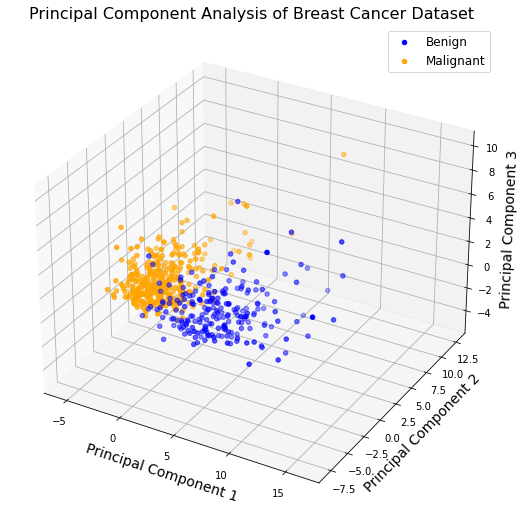

In [102]:
# Now, plot the visualization of the 569 samples to see how our samples are distributed among the three classes

# Setting up lables and titles
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(projection='3d') # Make visual 3D

# label the 3 axes
ax.set_xlabel('Principal Component 1',fontsize=14)
ax.set_ylabel('Principal Component 2',fontsize=14)
ax.set_zlabel('Principal Component 3',fontsize=14)

# Add plot title
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=16)

# Targets defined to be used in code below
targets = ['Benign', 'Malignant']
# Colors defined to be used in code below
colors = ['blue', 'orange']

# Plotting the data
for target, color in zip(targets,colors):
    # Take the 'label' column of breast_dataset and make everything 0 'benign' and 1 'malignant' (targets)
    indicesToKeep = breast_dataset['label'] == target
    
    # Create a scatter plot
    # locate 'indicesToKeep' from principal_breast_df and grab the 1st PC column
    ax.scatter(principal_breast_df.loc[indicesToKeep, 'principal component 1'], 
                # Do the same, but for the second column; add 'color' from for loop
                principal_breast_df.loc[indicesToKeep, 'principal component 2'],
                principal_breast_df.loc[indicesToKeep, 'principal component 3'],c = color)

# Edit the size of the legend
plt.legend(targets,prop={'size': 12})